In [11]:
import pandas as pd
from ast import literal_eval
import shutil
import cv2

In [12]:
df = pd.read_csv("test.txt")

In [13]:
df.head()

,image,digital annotation,handwritten annotation,forged,forgery annotations
0,X00016469619.png,1,1,0,0
1,X00016469620.png,1,1,0,0
2,X00016469669.png,1,1,0,0
3,X00016469676.png,1,1,0,0
4,X51005230616.png,0,1,1,"{'filename': 'X51005230616.png', 'size': 83540..."


In [14]:
df.iloc[4]["forgery annotations"]

"{'filename': 'X51005230616.png', 'size': 835401, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 27, 'y': 875, 'width': 29, 'height': 43}, 'region_attributes': {'Modified area': {'IMI': True}, 'Entity type': 'Product', 'Original area': 'no'}}, {'shape_attributes': {'name': 'rect', 'x': 458, 'y': 883, 'width': 35, 'height': 37}, 'region_attributes': {'Modified area': {'IMI': True}, 'Entity type': 'Product', 'Original area': 'no'}}], 'file_attributes': {'Software used': 'paint'}}"

In [5]:
data = literal_eval(df.iloc[17]["forgery annotations"])

In [6]:
data['regions'][1]

{'shape_attributes': {'name': 'rect',
  'x': 487,
  'y': 413,
  'width': 10,
  'height': 17},
 'region_attributes': {'Modified area': {'CPI': True},
  'Entity type': 'Metadata',
  'Original area': 'no'}}

In [7]:
def get_data(df,path,img_target,lablel_target):
    for annot in df["forgery annotations"]:
        #print(type(annot))
        if annot not in ['0',0]:
            data = literal_eval(annot)
            if "regions" in data and len(data['regions'])>0 and "shape_attributes" in data['regions'][0]:
                shutil.copy2(path+data['filename'], img_target)
                image = cv2.imread(path+data['filename'])
                with open(lablel_target+data['filename'].split('.')[0]+".txt", "w+") as file:
                    for sa in data['regions']:
                        try:
                            td = sa["shape_attributes"]
                            x,y,w,h = td['x'], td['y'], td['width'], td['height']
                            file.write(f"0 {(x + w / 2) / image.shape[1]} {(y + h / 2) / image.shape[0]} {w / image.shape[1]} {h / image.shape[0]}\n")
                        except Exception as ex:
                             print(ex, sa["shape_attributes"],data['filename'])

In [9]:
df = pd.read_csv("test.txt")
get_data(df,"./test/","./new_images/val/","./new_labels/val/")

In [3]:
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

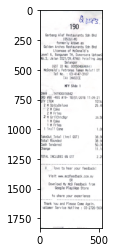

In [43]:
img = cv2.imread("./test/X51005230616.png")
plt.imshow(img)

In [44]:

x = 27
y = 875
width = 29
height = 43

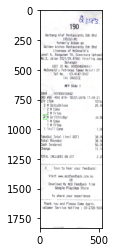

In [42]:
cv2.rectangle(img,(x,y),(x+width,y+height),(0,225,0),2)
plt.imshow(img)


In [45]:
nx,ny,nw,nh = (x + width / 2) / img.shape[1], (y + height / 2) / img.shape[0], width / img.shape[1], height / img.shape[0]

In [37]:
nx,ny,nw,nh = x / img.shape[1], y/ img.shape[0], width / img.shape[1], height / img.shape[0]

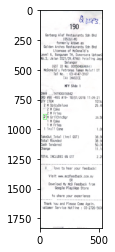

In [46]:
imh,imw = img.shape[0],img.shape[1]

x = int((nx-nw/2)*imw)
y = int((ny-nh/2)*imh)
w = int(nw*imw)
h = int(nh*imh)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,225,0),2)
plt.imshow(img)

In [39]:
x,y,w,h

(0, 20, 1, 1)